In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Contras stretching

##### Load image

In [2]:
img = cv2.imread('HW2_Q3_chest.tif', cv2.IMREAD_ANYDEPTH)

##### Display the image in the standard format

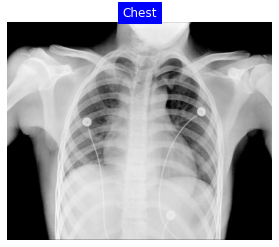

In [3]:
# disable x & y axis
plt.axis('off')
plt.title('Chest', color='white', backgroundcolor='blue')
plt.imshow(img, cmap = 'gray', vmin=0, vmax=2**16-1)

### Get data type and dimensions

In [4]:
img.dtype

dtype('uint16')

In [5]:
img.shape

(493, 600)

### Define constrast stretching function

In [6]:
def constrast_stretching(_img, _plot=True):
    n_bytes = _img.itemsize
    # Assign possible min and max values based on the number of bits
    a, b = 0, 2**(n_bytes*8)-1
    # Assign actual min and max values for intensity in the image
    c, d = _img.min(), _img.max()
    stretched_img = np.zeros(shape=_img.shape, dtype=_img.dtype)
    # Perform stretching
    stretched_img = ((_img - c)*((b - a)/(d - c)) + a).astype(_img.dtype)
    if _plot:
        # show image
        plt.axis('off')
        plt.title('Chest', color='white', backgroundcolor='blue')
        plt.imshow(stretched_img, cmap = 'gray', vmin=0, vmax=b)

    return stretched_img

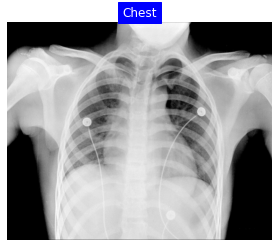

In [7]:
stretched_img = constrast_stretching(img)

### Plot images and their histograms

Text(0.5, 1.0, 'Stretched Histogram')

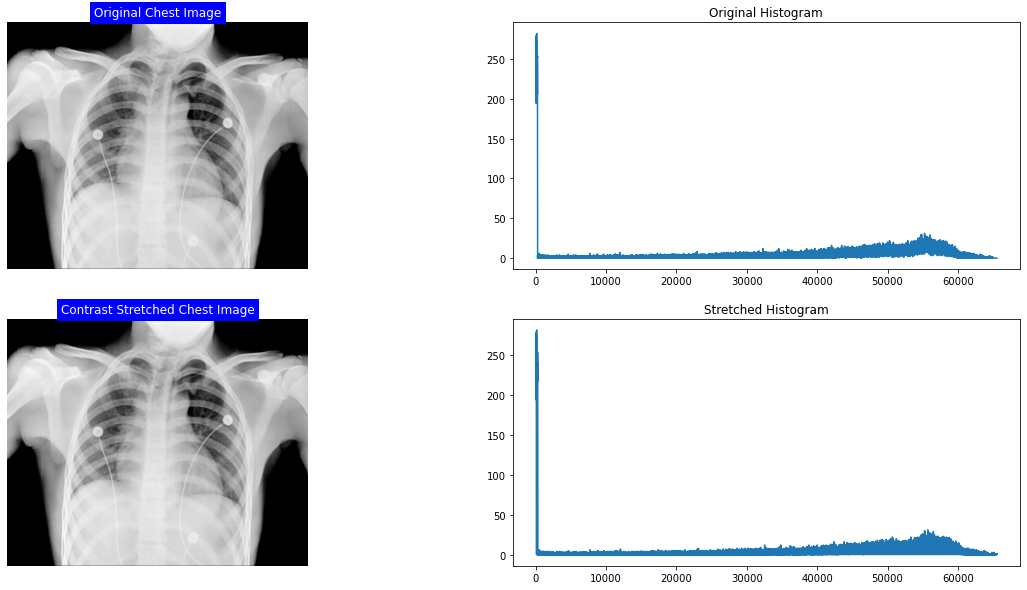

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

# Plot original image and its histogram
## disable x & y axis
ax[0][0].axis('off')
ax[0][0].set_title('Original Chest Image', color='white', backgroundcolor='blue')
ax[0][0].imshow(img, cmap = 'gray', vmin=0, vmax=2**16-1)

original_hist = cv2.calcHist([img], [0], None, [2**16], [0, 2**16])

ax[0][1].plot(original_hist)
ax[0][1].set_title('Original Histogram')

# Plot contrast stretched image and its histogram
## disable x & y axis
stretched_img = constrast_stretching(img, False)
ax[1][0].axis('off')
ax[1][0].set_title('Contrast Stretched Chest Image', color='white', backgroundcolor='blue')
ax[1][0].imshow(stretched_img, cmap = 'gray', vmin=0, vmax=2**16-1)

stretched_hist = cv2.calcHist([stretched_img], [0], None, [2**16], [0, 2**16])

ax[1][1].plot(stretched_hist)
ax[1][1].set_title('Stretched Histogram')

### Apply power-law (gamma) transformation

##### Load and display image

In [9]:
spine_img = cv2.imread('HW2_Q3_spine.tif', cv2.IMREAD_GRAYSCALE)

In [10]:
spine_img.dtype

dtype('uint8')

In [11]:
spine_img.shape

(512, 512)

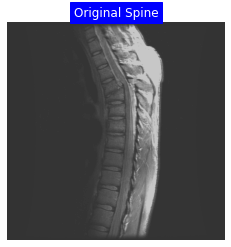

In [12]:
# show image
plt.axis('off')
plt.title('Original Spine', color='white', backgroundcolor='blue')
plt.imshow(spine_img, cmap = 'gray', vmin=0, vmax=2**(spine_img.itemsize*8)-1)

##### Define power law function

In [13]:
def power_law(_img, gamma, _plot=True):
    n_bytes = _img.itemsize
    c = (2**(n_bytes*8)-1)**(1-gamma)
    transformed_img = np.zeros(shape=_img.shape, dtype=_img.dtype)
    # Perform power law
    transformed_img = (c*(_img)**gamma).astype(_img.dtype)
    if _plot:
        # show image
        plt.axis('off')
        plt.title('Power Law Spine', color='white', backgroundcolor='blue')
        plt.imshow(transformed_img, cmap = 'gray', vmin=0, vmax=2**(n_bytes*8)-1)

    return transformed_img

##### Try various gamma values

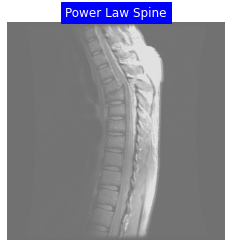

In [14]:
plaw_img = power_law(spine_img, 0.5)

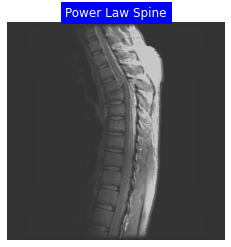

In [15]:
plaw_img = power_law(spine_img, 1)

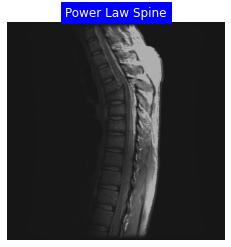

In [16]:
plaw_img = power_law(spine_img, 1.5)

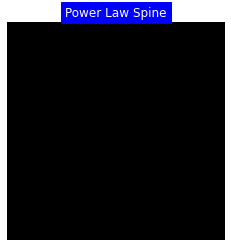

In [17]:
plaw_img = power_law(spine_img, 2)

As is evident, the best result is achieved when the gamma value is set to 1.5. In general, the power-law transformation tends to enhance the brightness of the image when the gamma value is low. As the gamma value increases, it has the opposite effect, diminishing the brightness. This observation aligns with the general understanding of power-law transformations, where lower gamma values boost brightness and higher values tone it down.

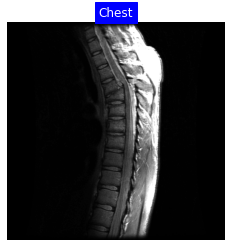

In [18]:
plaw_img = power_law(spine_img, 1.5)
cstretched_spine = constrast_stretching(spine_img)

### Compare the results of contrast stretching and power law

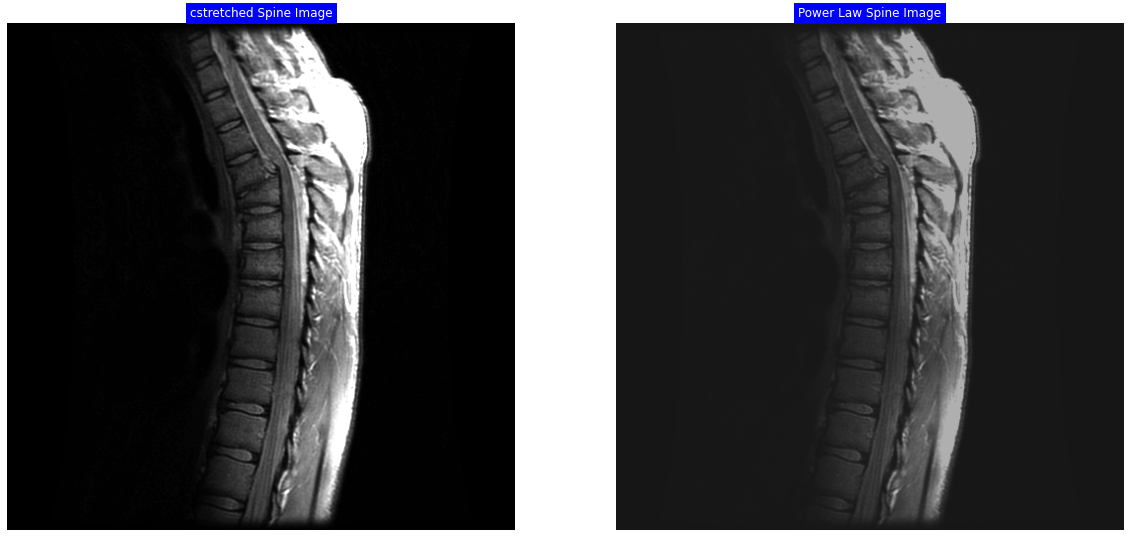

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

# Plot contrast stretching result
## disable x & y axis
ax[0].axis('off')
ax[0].set_title('cstretched Spine Image', color='white', backgroundcolor='blue')
ax[0].imshow(cstretched_spine, cmap = 'gray', vmin=0, vmax=2**(cstretched_spine.itemsize*8)-1)

# Plot power law result
## disable x & y axis
ax[1].axis('off')
plaw_img = power_law(spine_img, 1.5)
ax[1].set_title('Power Law Spine Image', color='white', backgroundcolor='blue')
ax[1].imshow(plaw_img, cmap = 'gray', vmin=0, vmax=2**(plaw_img.itemsize*8)-1)

As observed, the power-law transformation has reduced the existing contrast in the image by increasing the brightness of the pixels using gamma correction. On the other hand, contrast stretching uniformly stretches the histogram, ensuring that pixel intensities span the entire desired range, thereby increasing the image's contrast. In our specific application, where it's crucial to clearly distinguish between bone (bright) and joints (dark), contrast stretching proves to be more beneficial.

(Note: As I am not a biomedical engineering student, some higher-level interpretations based on the application may not be accurately expressed.)